In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv("/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/TRAIN.csv")
test=pd.read_csv("/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/TEST.csv")

In [3]:
train

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0
...,...,...,...,...,...,...,...,...,...
99995,99995,1543364124049,Uber,North End,West End,1.16,1.0,UberXL,12.0
99996,99996,1543364124049,Uber,North End,West End,1.16,1.0,Black SUV,26.0
99997,99997,1543364124049,Uber,North End,West End,1.16,1.0,Black,16.0
99998,99998,1543364124049,Uber,North End,West End,1.16,1.0,UberX,7.0


In [4]:
test_id=test["index"]

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [6]:
ID,Target="index","fare"

In [7]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df.shape

(125000, 9)

In [8]:
df = df.fillna(-999)
df.isnull().sum().sum()

0

In [9]:
num_cols=["distance","surge_multiplier"]
df_num_cols=df[num_cols]
df_num_cols.columns

Index(['distance', 'surge_multiplier'], dtype='object')

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
df_num=poly.fit_transform(df_num_cols)
df_num

array([[1.    , 3.03  , 1.    , 9.1809, 3.03  , 1.    ],
       [1.    , 1.3   , 1.    , 1.69  , 1.3   , 1.    ],
       [1.    , 2.71  , 1.    , 7.3441, 2.71  , 1.    ],
       ...,
       [1.    , 3.05  , 1.    , 9.3025, 3.05  , 1.    ],
       [1.    , 2.96  , 1.    , 8.7616, 2.96  , 1.    ],
       [1.    , 2.96  , 1.    , 8.7616, 2.96  , 1.    ]])

In [11]:
df_num_cols=pd.DataFrame(df_num)
df_num_cols=df_num_cols.rename(columns={0:"1",1:"distance",2:"surge_multiplier",3:"distance^2",4:"distance surge_multiplier",5:"surge_multiplier^2"})
df_num_cols.head()

,1,distance,surge_multiplier,distance^2,distance surge_multiplier,surge_multiplier^2
0,1.0,3.03,1.0,9.1809,3.03,1.0
1,1.0,1.30,1.0,1.6900,1.30,1.0
2,1.0,2.71,1.0,7.3441,2.71,1.0
3,1.0,2.43,1.0,5.9049,2.43,1.0
4,1.0,2.71,1.0,7.3441,2.71,1.0


In [12]:
df_num_cols["fare"]=df[Target]
df_num_cols.head()

,1,distance,surge_multiplier,distance^2,distance surge_multiplier,surge_multiplier^2,fare
0,1.0,3.03,1.0,9.1809,3.03,1.0,34.0
1,1.0,1.30,1.0,1.6900,1.30,1.0,18.5
2,1.0,2.71,1.0,7.3441,2.71,1.0,19.5
3,1.0,2.43,1.0,5.9049,2.43,1.0,10.5
4,1.0,2.71,1.0,7.3441,2.71,1.0,32.0


In [13]:
df_cat_cols=list(train.select_dtypes("object"))
df_cat_cols

['cab_provider', 'source', 'destination', 'cab_type']

In [14]:
df.nunique()

index               100000
time_stamp           22578
cab_provider             2
source                  12
destination             12
distance               531
surge_multiplier         7
cab_type                12
fare                   122
dtype: int64

In [15]:
cat_cols=list(df.select_dtypes("object"))
cat_cols

['cab_provider', 'source', 'destination', 'cab_type']

In [16]:
cat_data=pd.DataFrame()

In [17]:
for i in range(4):
    for j in range(3):
        if cat_cols[i]!=cat_cols[j+1]:
            if j>=i:
                #print(cat_cols[i]+"_"+cat_cols[j+1])
                cat_data[cat_cols[i]+" and "+cat_cols[j+1]]=df[cat_cols[i]]+"_"+df[cat_cols[j+1]]
                

In [18]:
cat_data

,cab_provider and source,cab_provider and destination,cab_provider and cab_type,source and destination,source and cab_type,destination and cab_type
0,Lyft_Boston University,Lyft_Theatre District,Lyft_Lux Black XL,Boston University_Theatre District,Boston University_Lux Black XL,Theatre District_Lux Black XL
1,Uber_South Station,Uber_Theatre District,Uber_Black,South Station_Theatre District,South Station_Black,Theatre District_Black
2,Uber_Theatre District,Uber_Fenway,Uber_UberX,Theatre District_Fenway,Theatre District_UberX,Fenway_UberX
3,Lyft_Northeastern University,Lyft_Beacon Hill,Lyft_Lyft,Northeastern University_Beacon Hill,Northeastern University_Lyft,Beacon Hill_Lyft
4,Uber_Theatre District,Uber_Fenway,Uber_UberXL,Theatre District_Fenway,Theatre District_UberXL,Fenway_UberXL
...,...,...,...,...,...,...
124995,Uber_North Station,Uber_Fenway,Uber_UberPool,North Station_Fenway,North Station_UberPool,Fenway_UberPool
124996,Uber_North Station,Uber_Fenway,Uber_WAV,North Station_Fenway,North Station_WAV,Fenway_WAV
124997,Uber_North Station,Uber_Fenway,Uber_Black SUV,North Station_Fenway,North Station_Black SUV,Fenway_Black SUV
124998,Lyft_Boston University,Lyft_Theatre District,Lyft_Shared,Boston University_Theatre District,Boston University_Shared,Theatre District_Shared


In [19]:
cat_data['fare']=df['fare']
cat_data

,cab_provider and source,cab_provider and destination,cab_provider and cab_type,source and destination,source and cab_type,destination and cab_type,fare
0,Lyft_Boston University,Lyft_Theatre District,Lyft_Lux Black XL,Boston University_Theatre District,Boston University_Lux Black XL,Theatre District_Lux Black XL,34.0
1,Uber_South Station,Uber_Theatre District,Uber_Black,South Station_Theatre District,South Station_Black,Theatre District_Black,18.5
2,Uber_Theatre District,Uber_Fenway,Uber_UberX,Theatre District_Fenway,Theatre District_UberX,Fenway_UberX,19.5
3,Lyft_Northeastern University,Lyft_Beacon Hill,Lyft_Lyft,Northeastern University_Beacon Hill,Northeastern University_Lyft,Beacon Hill_Lyft,10.5
4,Uber_Theatre District,Uber_Fenway,Uber_UberXL,Theatre District_Fenway,Theatre District_UberXL,Fenway_UberXL,32.0
...,...,...,...,...,...,...,...
124995,Uber_North Station,Uber_Fenway,Uber_UberPool,North Station_Fenway,North Station_UberPool,Fenway_UberPool,-999.0
124996,Uber_North Station,Uber_Fenway,Uber_WAV,North Station_Fenway,North Station_WAV,Fenway_WAV,-999.0
124997,Uber_North Station,Uber_Fenway,Uber_Black SUV,North Station_Fenway,North Station_Black SUV,Fenway_Black SUV,-999.0
124998,Lyft_Boston University,Lyft_Theatre District,Lyft_Shared,Boston University_Theatre District,Boston University_Shared,Theatre District_Shared,-999.0


In [20]:
cat_data.nunique()

cab_provider and source          24
cab_provider and destination     24
cab_provider and cab_type        12
source and destination           72
source and cab_type             144
destination and cab_type        144
fare                            122
dtype: int64

In [21]:
cat_data_col=list(cat_data.select_dtypes("object"))
cat_data_col

['cab_provider and source',
 'cab_provider and destination',
 'cab_provider and cab_type',
 'source and destination',
 'source and cab_type',
 'destination and cab_type']

In [22]:
cat_data=pd.get_dummies(cat_data,columns=cat_data_col)

In [23]:
cat_data['fare']

0          34.0
1          18.5
2          19.5
3          10.5
4          32.0
          ...  
124995   -999.0
124996   -999.0
124997   -999.0
124998   -999.0
124999   -999.0
Name: fare, Length: 125000, dtype: float64

In [24]:
cat_data=cat_data.drop([Target],axis=1)

In [25]:
cat_data

,cab_provider and source_Lyft_Back Bay,cab_provider and source_Lyft_Beacon Hill,cab_provider and source_Lyft_Boston University,cab_provider and source_Lyft_Fenway,cab_provider and source_Lyft_Financial District,cab_provider and source_Lyft_Haymarket Square,cab_provider and source_Lyft_North End,cab_provider and source_Lyft_North Station,cab_provider and source_Lyft_Northeastern University,cab_provider and source_Lyft_South Station,cab_provider and source_Lyft_Theatre District,cab_provider and source_Lyft_West End,cab_provider and source_Uber_Back Bay,cab_provider and source_Uber_Beacon Hill,cab_provider and source_Uber_Boston University,cab_provider and source_Uber_Fenway,cab_provider and source_Uber_Financial District,cab_provider and source_Uber_Haymarket Square,cab_provider and source_Uber_North End,cab_provider and source_Uber_North Station,cab_provider and source_Uber_Northeastern University,cab_provider and source_Uber_South Station,cab_provider and source_Uber_Theatre District,cab_provider and source_Uber_West End,cab_provider and destination_Lyft_Back Bay,cab_provider and destination_Lyft_Beacon Hill,cab_provider and destination_Lyft_Boston University,cab_provider and destination_Lyft_Fenway,cab_provider and destination_Lyft_Financial District,cab_provider and destination_Lyft_Haymarket Square,cab_provider and destination_Lyft_North End,cab_provider and destination_Lyft_North Station,cab_provider and destination_Lyft_Northeastern University,cab_provider and destination_Lyft_South Station,cab_provider and destination_Lyft_Theatre District,cab_provider and destination_Lyft_West End,cab_provider and destination_Uber_Back Bay,cab_provider and destination_Uber_Beacon Hill,cab_provider and destination_Uber_Boston University,cab_provider and destination_Uber_Fenway,...,destination and cab_type_Northeastern University_UberPool,destination and cab_type_Northeastern University_UberX,destination and cab_type_Northeastern University_UberXL,destination and cab_type_Northeastern University_WAV,destination and cab_type_South Station_Black,destination and cab_type_South Station_Black SUV,destination and cab_type_South Station_Lux,destination and cab_type_South Station_Lux Black,destination and cab_type_South Station_Lux Black XL,destination and cab_type_South Station_Lyft,destination and cab_type_South Station_Lyft XL,destination and cab_type_South Station_Shared,destination and cab_type_South Station_UberPool,destination and cab_type_South Station_UberX,destination and cab_type_South Station_UberXL,destination and cab_type_South Station_WAV,destination and cab_type_Theatre District_Black,destination and cab_type_Theatre District_Black SUV,destination and cab_type_Theatre District_Lux,destination and cab_type_Theatre District_Lux Black,destination and cab_type_Theatre District_Lux Black XL,destination and cab_type_Theatre District_Lyft,destination and cab_type_Theatre District_Lyft XL,destination and cab_type_Theatre District_Shared,destination and cab_type_Theatre District_UberPool,destination and cab_type_Theatre District_UberX,destination and cab_type_Theatre District_UberXL,destination and cab_type_Theatre District_WAV,destination and cab_type_West End_Black,destination and cab_type_West End_Black SUV,destination and cab_type_West End_Lux,destination and cab_type_West End_Lux Black,destination and cab_type_West End_Lux Black XL,destination and cab_type_West End_Lyft,destination and cab_type_West End_Lyft XL,destination and cab_type_West End_Shared,destination and cab_type_West End_UberPool,destination and cab_type_West End_UberX,destination and cab_type_West End_UberXL,destination and cab_type_West End_WAV
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
df_num_cols

,1,distance,surge_multiplier,distance^2,distance surge_multiplier,surge_multiplier^2,fare
0,1.0,3.03,1.0,9.1809,3.03,1.0,34.0
1,1.0,1.30,1.0,1.6900,1.30,1.0,18.5
2,1.0,2.71,1.0,7.3441,2.71,1.0,19.5
3,1.0,2.43,1.0,5.9049,2.43,1.0,10.5
4,1.0,2.71,1.0,7.3441,2.71,1.0,32.0
...,...,...,...,...,...,...,...
124995,1.0,3.05,1.0,9.3025,3.05,1.0,-999.0
124996,1.0,3.05,1.0,9.3025,3.05,1.0,-999.0
124997,1.0,3.05,1.0,9.3025,3.05,1.0,-999.0
124998,1.0,2.96,1.0,8.7616,2.96,1.0,-999.0


In [27]:
df_full = pd.concat([cat_data,df_num_cols], axis=1).reset_index(drop = True)
df_full.shape

(125000, 427)

In [28]:
train.shape

(100000, 9)

In [29]:
train, test = df_full[:train.shape[0]], df_full[train.shape[0]:].reset_index(drop = True)
features = [c for c in train.columns if c not in [ID, Target]]
features

['cab_provider and source_Lyft_Back Bay',
 'cab_provider and source_Lyft_Beacon Hill',
 'cab_provider and source_Lyft_Boston University',
 'cab_provider and source_Lyft_Fenway',
 'cab_provider and source_Lyft_Financial District',
 'cab_provider and source_Lyft_Haymarket Square',
 'cab_provider and source_Lyft_North End',
 'cab_provider and source_Lyft_North Station',
 'cab_provider and source_Lyft_Northeastern University',
 'cab_provider and source_Lyft_South Station',
 'cab_provider and source_Lyft_Theatre District',
 'cab_provider and source_Lyft_West End',
 'cab_provider and source_Uber_Back Bay',
 'cab_provider and source_Uber_Beacon Hill',
 'cab_provider and source_Uber_Boston University',
 'cab_provider and source_Uber_Fenway',
 'cab_provider and source_Uber_Financial District',
 'cab_provider and source_Uber_Haymarket Square',
 'cab_provider and source_Uber_North End',
 'cab_provider and source_Uber_North Station',
 'cab_provider and source_Uber_Northeastern University',
 'cab_p

In [30]:
train.shape

(100000, 427)

In [31]:
test

,cab_provider and source_Lyft_Back Bay,cab_provider and source_Lyft_Beacon Hill,cab_provider and source_Lyft_Boston University,cab_provider and source_Lyft_Fenway,cab_provider and source_Lyft_Financial District,cab_provider and source_Lyft_Haymarket Square,cab_provider and source_Lyft_North End,cab_provider and source_Lyft_North Station,cab_provider and source_Lyft_Northeastern University,cab_provider and source_Lyft_South Station,cab_provider and source_Lyft_Theatre District,cab_provider and source_Lyft_West End,cab_provider and source_Uber_Back Bay,cab_provider and source_Uber_Beacon Hill,cab_provider and source_Uber_Boston University,cab_provider and source_Uber_Fenway,cab_provider and source_Uber_Financial District,cab_provider and source_Uber_Haymarket Square,cab_provider and source_Uber_North End,cab_provider and source_Uber_North Station,cab_provider and source_Uber_Northeastern University,cab_provider and source_Uber_South Station,cab_provider and source_Uber_Theatre District,cab_provider and source_Uber_West End,cab_provider and destination_Lyft_Back Bay,cab_provider and destination_Lyft_Beacon Hill,cab_provider and destination_Lyft_Boston University,cab_provider and destination_Lyft_Fenway,cab_provider and destination_Lyft_Financial District,cab_provider and destination_Lyft_Haymarket Square,cab_provider and destination_Lyft_North End,cab_provider and destination_Lyft_North Station,cab_provider and destination_Lyft_Northeastern University,cab_provider and destination_Lyft_South Station,cab_provider and destination_Lyft_Theatre District,cab_provider and destination_Lyft_West End,cab_provider and destination_Uber_Back Bay,cab_provider and destination_Uber_Beacon Hill,cab_provider and destination_Uber_Boston University,cab_provider and destination_Uber_Fenway,...,destination and cab_type_South Station_Lux Black,destination and cab_type_South Station_Lux Black XL,destination and cab_type_South Station_Lyft,destination and cab_type_South Station_Lyft XL,destination and cab_type_South Station_Shared,destination and cab_type_South Station_UberPool,destination and cab_type_South Station_UberX,destination and cab_type_South Station_UberXL,destination and cab_type_South Station_WAV,destination and cab_type_Theatre District_Black,destination and cab_type_Theatre District_Black SUV,destination and cab_type_Theatre District_Lux,destination and cab_type_Theatre District_Lux Black,destination and cab_type_Theatre District_Lux Black XL,destination and cab_type_Theatre District_Lyft,destination and cab_type_Theatre District_Lyft XL,destination and cab_type_Theatre District_Shared,destination and cab_type_Theatre District_UberPool,destination and cab_type_Theatre District_UberX,destination and cab_type_Theatre District_UberXL,destination and cab_type_Theatre District_WAV,destination and cab_type_West End_Black,destination and cab_type_West End_Black SUV,destination and cab_type_West End_Lux,destination and cab_type_West End_Lux Black,destination and cab_type_West End_Lux Black XL,destination and cab_type_West End_Lyft,destination and cab_type_West End_Lyft XL,destination and cab_type_West End_Shared,destination and cab_type_West End_UberPool,destination and cab_type_West End_UberX,destination and cab_type_West End_UberXL,destination and cab_type_West End_WAV,1,distance,surge_multiplier,distance^2,distance surge_multiplier,surge_multiplier^2,fare
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.59,1.0,0.3481,0.59,1.0,-999.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.59,1.0,0.3481,0.59,1.0,-999.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,6.83,1.0,46.6489,6.83,1.0,-999.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [32]:
target=train[Target]

In [33]:
X=train[features]
y=target
X.shape

(100000, 426)

In [34]:
dgag

NameError: ignored

In [35]:

test.shape

(25000, 427)

In [36]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.3)


In [37]:
xgb.fit(X,y)

[13:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
import math

In [39]:
pred=xgb.predict(X)
print(math.sqrt(mean_squared_error(y, pred)))
#pred=xgb.predict(test)

1.7554828545200831


In [40]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.31,max_depth=6)
xgb.fit(X,y)
pred=xgb.predict(X)
print(math.sqrt(mean_squared_error(y, pred)))

[13:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.5963764882504565


In [47]:
pred=xgb.predict(test.drop('fare',axis=1))

In [48]:
submission=pd.concat([test_id,pd.Series(pred,name='fare')],axis=1)
path='/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/submit'+str(45)+'.csv'
submission.to_csv(path,index=False)

In [46]:
test.shape

(25000, 427)

In [ ]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.34,max_depth=6)
xgb.fit(x1,y1)
pred=xgb.predict(x1)
print(math.sqrt(mean_squared_error(y1, pred)))
pred=xgb.predict(x2)
print(math.sqrt(mean_squared_error(y2, pred)))

[09:07:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.595040001062441
1.6357851607802532


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.3,max_depth=6)
xgb.fit(x1,y1)
pred=xgb.predict(x1)
print(math.sqrt(mean_squared_error(y1, pred)))
pred=xgb.predict(x2)
print(math.sqrt(mean_squared_error(y2, pred)))

[09:11:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.5970042585484154
1.6314910685541777


In [ ]:
feature_importances=pd.DataFrame({'features':x1.columns,'feature_importance':xgb.feature_importances_})
print(feature_importances.sort_values('feature_importance',ascending=False))


                                              features  feature_importance
50         cab_provider and cab_type_Lyft_Lux Black XL        2.810459e-01
55            cab_provider and cab_type_Uber_Black SUV        2.742869e-01
49            cab_provider and cab_type_Lyft_Lux Black        8.297285e-02
54                cab_provider and cab_type_Uber_Black        6.520887e-02
53               cab_provider and cab_type_Lyft_Shared        5.143087e-02
..                                                 ...                 ...
30         cab_provider and destination_Lyft_North End        1.283619e-05
266  destination and cab_type_Northeastern Universi...        1.150668e-05
204                   source and cab_type_West End_WAV        1.064747e-05
247         destination and cab_type_North End_Lyft XL        8.606919e-06
140         source and cab_type_Boston University_Lyft        1.910763e-07

[291 rows x 2 columns]


In [ ]:
sum(feature_importances['feature_importance']<0.0001)

122

In [ ]:
remove=list(feature_importances[feature_importances['feature_importance']<0.0001]['features'])

In [ ]:
X=X.drop(remove,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.3,max_depth=6)
xgb.fit(x1,y1)
pred=xgb.predict(x1)
print(math.sqrt(mean_squared_error(y1, pred)))
pred=xgb.predict(x2)
print(math.sqrt(mean_squared_error(y2, pred)))

[09:26:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.5900375091800771
1.627751876262971


In [ ]:
test_df=test[x1.columns]

In [ ]:
pred=xgb.predict(test_df)

In [ ]:
submission=pd.concat([test_id,pd.Series(pred,name='fare')],axis=1)
path='/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/submit'+str(45)+'.csv'
submission.to_csv(path,index=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons,  activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    return model

In [ ]:
# Defining grid parameters
activation = ['relu']
neurons = [100,60,30,10]
optimizer = ['Adam', 'Adamax']
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

clf = KerasRegressor(build_fn= DL_Model, epochs= 5, batch_size=1024, verbose= 2)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
model.fit(x1,y1)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/5
79/79 - 2s - loss: 174.8159 - mse: 174.8159
Epoch 2/5
79/79 - 1s - loss: 59.7486 - mse: 59.7486
Epoch 3/5
79/79 - 1s - loss: 54.0831 - mse: 54.0831
Epoch 4/5
79/79 - 1s - loss: 53.9462 - mse: 53.9462
Epoch 5/5
79/79 - 1s - loss: 53.4558 - mse: 53.4558


GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7ff7fce63190>,
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu'], 'neurons': [100, 60, 30, 10],
                         'optimizer': ['Adam', 'Adamax']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
  model = Sequential()
  model.add(Dense(100,  activation= 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(70, activation= 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(10, activation= 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mse', optimizer= 'adam', metrics=['mse'])
  

In [ ]:
history=model.fit(x1,y1,batch_size=64,epochs=100,validation_data=(x2,y2),validation_batch_size=64)

Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 92.6008 - mse: 92.6008 - val_loss: 10.4334 - val_mse: 10.4334
Epoch 2/100
1250/1250 [==============================] - 3s 3ms/step - loss: 40.6098 - mse: 40.6098 - val_loss: 5.6700 - val_mse: 5.6700
Epoch 3/100
1250/1250 [==============================] - 3s 3ms/step - loss: 37.9104 - mse: 37.9104 - val_loss: 6.4363 - val_mse: 6.4363
Epoch 4/100
1250/1250 [==============================] - 3s 3ms/step - loss: 33.9585 - mse: 33.9585 - val_loss: 4.9280 - val_mse: 4.9280
Epoch 5/100
1250/1250 [==============================] - 3s 3ms/step - loss: 30.8883 - mse: 30.8883 - val_loss: 6.7261 - val_mse: 6.7261
Epoch 6/100
1250/1250 [==============================] - 3s 3ms/step - loss: 27.3886 - mse: 27.3886 - val_loss: 6.5556 - val_mse: 6.5556
Epoch 7/100
1250/1250 [==============================] - 3s 3ms/step - loss: 25.0280 - mse: 25.0280 - val_loss: 5.1020 - val_mse: 5.1020
Epoch 8/100
1250/1250 [================

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.34,max_depth=8)
xgb.fit(X,y)
pred=xgb.predict(X)
print(math.sqrt(mean_squared_error(y, pred)))

[09:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.524455030146984


In [ ]:
l_rate=[0.35,0.36,0.38]
m_dep=[8,9]

In [ ]:
rms=[]
for i in l_rate:
  for j in m_dep:
    xgb = XGBRegressor(learning_rate=i,max_depth=j)
    xgb.fit(X,y)
    pred=xgb.predict(X)
    rms.append(math.sqrt(mean_squared_error(y, pred)))

[09:42:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:56:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:59:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rms

[1.5239982670436703,
 1.5004254155333414,
 1.5239206986144338,
 1.4998019958835869,
 1.5168681660559153,
 1.4956172987694012]

In [ ]:
l_rate=[0.39,0.4]
m_dep=[9,10]
n_emt=[100,110,120]

In [ ]:
rms=[]
for i in l_rate:
  for j in m_dep:
    for k in n_emt:
      xgb = XGBRegressor(learning_rate=i,max_depth=j,n_estimators=k)
      xgb.fit(X,y)
      pred=xgb.predict(X)
      rms.append(math.sqrt(mean_squared_error(y, pred)))

[10:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:15:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:19:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
mm=int(0)
for i in l_rate:
  for j in m_dep:
    for k in n_emt:
      print(i,j,k ,rms[mm])
      mm+=1

0.39 9 100 1.4947563986320185
0.39 9 110 1.4903736319430898
0.39 9 120 1.485557340360641
0.39 10 100 1.480422642923484
0.39 10 110 1.4762372249780948
0.39 10 120 1.472394746037177
0.4 9 100 1.4920109594996356
0.4 9 110 1.4869047254681296
0.4 9 120 1.4828227495268933
0.4 10 100 1.4782585352563584
0.4 10 110 1.4736300661398423
0.4 10 120 1.4702514481697577


In [ ]:
test=test.drop('fare',axis=1)
test

,cab_provider and source_Lyft_Back Bay,cab_provider and source_Lyft_Beacon Hill,cab_provider and source_Lyft_Boston University,cab_provider and source_Lyft_Fenway,cab_provider and source_Lyft_Financial District,cab_provider and source_Lyft_Haymarket Square,cab_provider and source_Lyft_North End,cab_provider and source_Lyft_North Station,cab_provider and source_Lyft_Northeastern University,cab_provider and source_Lyft_South Station,cab_provider and source_Lyft_Theatre District,cab_provider and source_Lyft_West End,cab_provider and source_Uber_Back Bay,cab_provider and source_Uber_Beacon Hill,cab_provider and source_Uber_Boston University,cab_provider and source_Uber_Fenway,cab_provider and source_Uber_Financial District,cab_provider and source_Uber_Haymarket Square,cab_provider and source_Uber_North End,cab_provider and source_Uber_North Station,cab_provider and source_Uber_Northeastern University,cab_provider and source_Uber_South Station,cab_provider and source_Uber_Theatre District,cab_provider and source_Uber_West End,cab_provider and destination_Lyft_Back Bay,cab_provider and destination_Lyft_Beacon Hill,cab_provider and destination_Lyft_Boston University,cab_provider and destination_Lyft_Fenway,cab_provider and destination_Lyft_Financial District,cab_provider and destination_Lyft_Haymarket Square,cab_provider and destination_Lyft_North End,cab_provider and destination_Lyft_North Station,cab_provider and destination_Lyft_Northeastern University,cab_provider and destination_Lyft_South Station,cab_provider and destination_Lyft_Theatre District,cab_provider and destination_Lyft_West End,cab_provider and destination_Uber_Back Bay,cab_provider and destination_Uber_Beacon Hill,cab_provider and destination_Uber_Boston University,cab_provider and destination_Uber_Fenway,...,destination and cab_type_South Station_Lux,destination and cab_type_South Station_Lux Black,destination and cab_type_South Station_Lux Black XL,destination and cab_type_South Station_Lyft,destination and cab_type_South Station_Lyft XL,destination and cab_type_South Station_Shared,destination and cab_type_South Station_UberPool,destination and cab_type_South Station_UberX,destination and cab_type_South Station_UberXL,destination and cab_type_South Station_WAV,destination and cab_type_Theatre District_Black,destination and cab_type_Theatre District_Black SUV,destination and cab_type_Theatre District_Lux,destination and cab_type_Theatre District_Lux Black,destination and cab_type_Theatre District_Lux Black XL,destination and cab_type_Theatre District_Lyft,destination and cab_type_Theatre District_Lyft XL,destination and cab_type_Theatre District_Shared,destination and cab_type_Theatre District_UberPool,destination and cab_type_Theatre District_UberX,destination and cab_type_Theatre District_UberXL,destination and cab_type_Theatre District_WAV,destination and cab_type_West End_Black,destination and cab_type_West End_Black SUV,destination and cab_type_West End_Lux,destination and cab_type_West End_Lux Black,destination and cab_type_West End_Lux Black XL,destination and cab_type_West End_Lyft,destination and cab_type_West End_Lyft XL,destination and cab_type_West End_Shared,destination and cab_type_West End_UberPool,destination and cab_type_West End_UberX,destination and cab_type_West End_UberXL,destination and cab_type_West End_WAV,1,distance,surge_multiplier,distance^2,distance surge_multiplier,surge_multiplier^2
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.59,1.0,0.3481,0.59,1.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.59,1.0,0.3481,0.59,1.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,6.83,1.0,46.6489,6.83,1.0
3,0,0,0,0,0,

In [ ]:
pred=xgb.predict(test)
pred

array([10.70778 , 26.809559, 17.432907, ..., 32.919178,  6.681241,
       19.836445], dtype=float32)

In [ ]:
submission=pd.concat([test_id,pd.Series(pred)],axis=1)

In [ ]:
submission.to_csv('/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/submit1.csv',index=False)

In [ ]:
xgb = XGBRegressor(learning_rate=0.34,max_depth=8)
xgb.fit(X,y)
pred=xgb.predict(X)
print(math.sqrt(mean_squared_error(y, pred)))

[11:14:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.524455030146984


In [ ]:
pred=xgb.predict(test)
pred

array([10.779793, 26.779856, 17.52793 , ..., 33.021404,  6.881684,
       20.193935], dtype=float32)

In [ ]:
submission=pd.concat([test_id,pd.Series(pred)],axis=1)
submission.to_csv('/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/submit2.csv',index=False)

In [ ]:
l_rate=[0.37,0.39,0.4,0.41]
#m_dep=[9,10]
n_emt=[100,110,120,140]

In [ ]:
rms=[]
j=0
for i in l_rate:
  for k in n_emt:
    xgb = XGBRegressor(learning_rate=i,max_depth=8,n_estimators=k)
    xgb.fit(X,y)
    pred=xgb.predict(test)
    submission=pd.concat([test_id,pd.Series(pred,name='fare')],axis=1)
    path='/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/submit'+str(j)+'.csv'
    submission.to_csv(path,index=False)
    j+=1

[14:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [ ]:
xgb = XGBRegressor(learning_rate=0.344,max_depth=8)
xgb.fit(X,y)
pred=xgb.predict(test)
submission=pd.concat([test_id,pd.Series(pred,name='fare')],axis=1)
path='/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/submit'+str(40)+'.csv'
submission.to_csv(path,index=False)

NameError: ignored

In [ ]:
# above accuracy was 1.65

In [ ]:
x1.shape,x2.shape

((80000, 426), (20000, 426))

In [ ]:
l_rate=[0.33,0.35,0.37,0.39,0.41]
m_dep=[9,10]
n_emt=[100]

In [ ]:
rms1=[]
rms2=[]

In [ ]:

for k in n_emt:
  for j in m_dep:
    for i in l_rate:
      xgb = XGBRegressor(learning_rate=i,max_depth=j,n_estimators=k)
      xgb.fit(x1,y1)
      pred=xgb.predict(x1)
      rms1.append(math.sqrt(mean_squared_error(y1, pred)))
      pred=xgb.predict(x2)
      rms2.append(math.sqrt(mean_squared_error(y2, pred)))

[15:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:58:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [ ]:
rms1

[1.5587400654541914,
 1.5467553510906513,
 1.544595418083829,
 1.5421838327554351,
 1.4970953931707738,
 1.4975464578672342,
 1.4970953931707738,
 1.4975464578672342,
 1.489994458194356,
 1.4881306421217175,
 1.4879118974394447,
 1.481548162156092]

In [ ]:
rms2

[1.6234056976000766,
 1.6167996068903647,
 1.620519117920512,
 1.618198415559965,
 1.61544746369886,
 1.6189811803822645,
 1.61544746369886,
 1.6189811803822645,
 1.6199364442575037,
 1.6183394770655,
 1.6256345919640132,
 1.616416784088658]

In [ ]:
rms1

[18.601114702820905,
 1.9557905195659902e+31,
 1.5955269138554096,
 1.5922353182541105,
 1.5886361080536502,
 1.5827761364029405,
 1.57817925479836,
 1.5783254419800554,
 1.57649309153584,
 18.601114702820905,
 1.937995784845578e+31,
 1.5504047269765449,
 1.5587400654541914,
 1.5467553510906513]

In [ ]:
rms2

[18.51986939748766,
 1.9557905195659902e+31,
 1.6403786192390397,
 1.6351100472682665,
 1.6372758860433803,
 1.6324147112382703,
 1.632402830939804,
 1.6333128306250164,
 1.6323355276980402,
 18.51986939748766,
 1.9379957847261964e+31,
 1.6202260604895278,
 1.6234056976000766,
 1.6167996068903647]

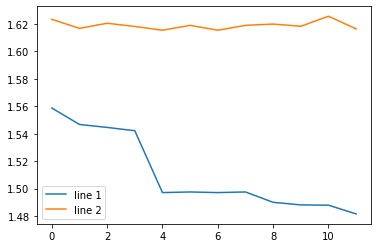

In [ ]:
import matplotlib.pyplot as plt
  
plt.plot(rms1, label = "line 1")
plt.plot(rms2, label = "line 2")
plt.legend()
plt.show()

In [ ]:
pred=xgb.predict(test)


XGBoostError: ignored

In [ ]:
pred=xgb.predict(x1)
math.sqrt(mean_squared_error(y1, pred))

NameError: ignored

In [ ]:
math.sqrt(mean_squared_error(y2, pred))

1.6213513294663724

In [ ]:
xgb = XGBRegressor(learning_rate=i,max_depth=j)
      xgb.fit(x1,y1)

1.5202487978422847

In [ ]:
pred=xgb.predict(test)

In [ ]:
submission=pd.concat([test_id,pd.Series(pred,name='fare')],axis=1)
path='/content/drive/MyDrive/cab_fare_prediction_ai_challenge-dataset/submit'+str(45)+'.csv'
submission.to_csv(path,index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
x1 = scaler.fit_transform(x1)
x2 = scaler.transform(x2)

In [ ]:
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

# input layer
model.add(Dense(200,activation='relu'))

# hidden layers
model.add(Dense(100,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa4e39b5250>>

In [ ]:
model.fit(x=x1,y=y1,
          validation_data=(x2,y2),
          batch_size=128,epochs=400)

625/625 [==============================] - 3s 4ms/step - loss: 2.7948 - val_loss: 2.7973
Epoch 146/400
625/625 [==============================] - 3s 4ms/step - loss: 2.8067 - val_loss: 2.8041
Epoch 147/400
625/625 [==============================] - 3s 4ms/step - loss: 2.8529 - val_loss: 2.7946
Epoch 148/400
625/625 [==============================] - 3s 4ms/step - loss: 2.8010 - val_loss: 2.7969
Epoch 149/400
276/625 [============>.................] - ETA: 1s - loss: 2.8797

KeyboardInterrupt: ignored

In [ ]:
import seaborn as sns

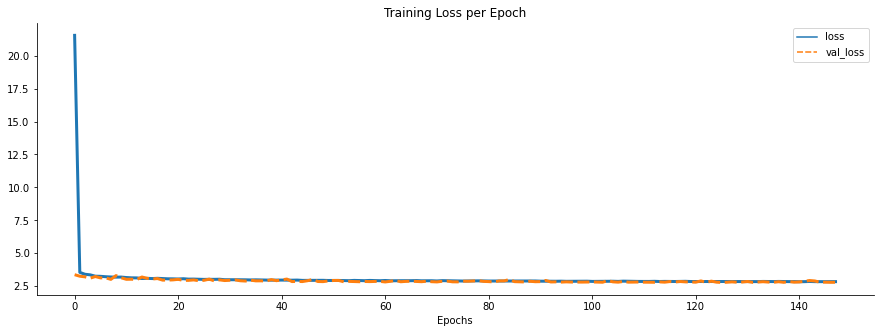

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
predictions = model.predict(x2)

print('MAE: ',mean_absolute_error(y2,predictions))
print('MSE: ',mean_squared_error(y2,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y2,predictions)))

MAE:  1.0968594948410988
MSE:  2.8124962334164056
RMSE:  1.677049860146205
